In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [3]:
# 1. Data Exploration
# Read dataset
df = pd.read_csv("C:\\Users\\Latitude\\Desktop\\InternCareer\\Task 1 YouTube Streamer Analysis-20240421T194008Z-001\\Task 1 YouTube Streamer Analysis\\youtubers_df.csv")


In [4]:
# Check structure and summary statistics
df.head()

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,NaN,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...


In [5]:
df.tail()

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
995,996,hamzymukbang,NaN,11700000.0,Estados Unidos,397400.0,14000.0,124.0,http://youtube.com/channel/UCPKNKldggioffXPkSm...
996,997,Adaahqueen,NaN,11700000.0,India,1100000.0,92500.0,164.0,http://youtube.com/channel/UCk3fFpqI5kDMf__mUP...
997,998,LittleAngelIndonesia,Música y baile,11700000.0,Unknown,211400.0,745.0,0.0,http://youtube.com/channel/UCdrHrQf0o0TO8YDntX...
998,999,PenMultiplex,NaN,11700000.0,India,14000.0,81.0,1.0,http://youtube.com/channel/UCObyBrdrtQ20BU9PxH...
999,1000,OneindiaHindi,Noticias y Política,11700000.0,India,2200.0,31.0,1.0,http://youtube.com/channel/UCOjgc1p2hJ4GZi6pQQ...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        1000 non-null   int64  
 1   Username    1000 non-null   object 
 2   Categories  694 non-null    object 
 3   Suscribers  1000 non-null   float64
 4   Country     1000 non-null   object 
 5   Visits      1000 non-null   float64
 6   Likes       1000 non-null   float64
 7   Comments    1000 non-null   float64
 8   Links       1000 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 70.4+ KB


In [7]:
df.describe()

,Rank,Suscribers,Visits,Likes,Comments
count,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000
mean,500.500000,2.189440e+07,1.209446e+06,5.363259e+04,1288.768000
std,288.819436,1.682775e+07,5.229942e+06,2.580457e+05,6778.188308
min,1.000000,1.170000e+07,0.000000e+00,0.000000e+00,0.000000
25%,250.750000,1.380000e+07,3.197500e+04,4.717500e+02,2.000000
50%,500.500000,1.675000e+07,1.744500e+05,3.500000e+03,67.000000
75%,750.250000,2.370000e+07,8.654750e+05,2.865000e+04,472.000000
max,1000.000000,2.495000e+08,1.174000e+08,5.300000e+06,154000.000000


In [8]:
df.columns

Index(['Rank', 'Username', 'Categories', 'Suscribers', 'Country', 'Visits',
       'Likes', 'Comments', 'Links'],
      dtype='object')

In [9]:
# Check for missing data
df.isnull().sum()

Rank            0
Username        0
Categories    306
Suscribers      0
Country         0
Visits          0
Likes           0
Comments        0
Links           0
dtype: int64

In [10]:
df.nunique()

Rank          1000
Username       994
Categories      45
Suscribers     274
Country         29
Visits         713
Likes          648
Comments       389
Links          994
dtype: int64

In [11]:
df.shape

(1000, 9)

In [12]:
df.index

RangeIndex(start=0, stop=1000, step=1)

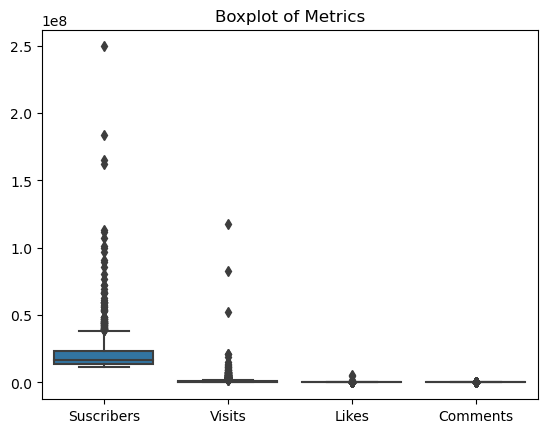

In [14]:
# Check & Visualize outliers using box plots
sns.boxplot(data=df[['Suscribers', 'Visits', 'Likes', 'Comments']])
plt.title("Boxplot of Metrics")
plt.show()

In [16]:
# handle outliers
columns = df[['Suscribers', 'Visits', 'Likes', 'Comments']]

In [17]:
# Calculate IQR for all four columns
Q1 = df[['Suscribers', 'Visits', 'Likes', 'Comments']].quantile(0.25)
Q3 = df[['Suscribers', 'Visits', 'Likes', 'Comments']].quantile(0.75)
IQR = Q3 - Q1

# Display IQR for all four columns
print("IQR for Suscribers:", IQR['Suscribers'])
print("IQR for Visits:", IQR['Visits'])
print("IQR for Likes:", IQR['Likes'])
print("IQR for Comments:", IQR['Comments'])


IQR for Suscribers: 9900000.0
IQR for Visits: 833500.0
IQR for Likes: 28178.25
IQR for Comments: 470.0


In [18]:
# Lower and uper bound outliers
lower_bound_subscribers = Q1['Suscribers'] - 1.5 * IQR['Suscribers']
upper_bound_subscribers = Q3['Suscribers'] + 1.5 * IQR['Suscribers']

lower_bound_visits = Q1['Visits'] - 1.5 * IQR['Visits']
upper_bound_visits = Q3['Visits'] + 1.5 * IQR['Visits']

lower_bound_likes = Q1['Likes'] - 1.5 * IQR['Likes']
upper_bound_likes = Q3['Likes'] + 1.5 * IQR['Likes']

lower_bound_comments = Q1['Comments'] - 1.5 * IQR['Comments']
upper_bound_comments = Q3['Comments'] + 1.5 * IQR['Comments']

In [19]:
# Remove outliers based on the defined lower and upper bounds for all columns
df_with_no_outliers = df[
    (df['Suscribers'] >= lower_bound_subscribers) & (df['Suscribers'] <= upper_bound_subscribers) &
    (df['Visits'] >= lower_bound_visits) & (df['Visits'] <= upper_bound_visits) &
    (df['Likes'] >= lower_bound_likes) & (df['Likes'] <= upper_bound_likes) &
    (df['Comments'] >= lower_bound_comments) & (df['Comments'] <= upper_bound_comments)
]


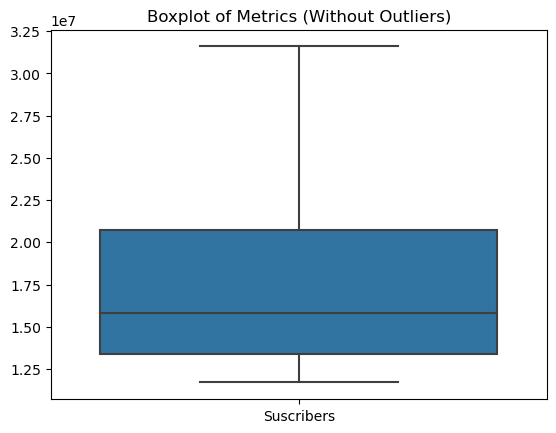

In [20]:
# Boxplot without outliers for suscribers
sns.boxplot(data=df_with_no_outliers[['Suscribers']],showfliers=False)
plt.title("Boxplot of Metrics (Without Outliers)")
plt.show()

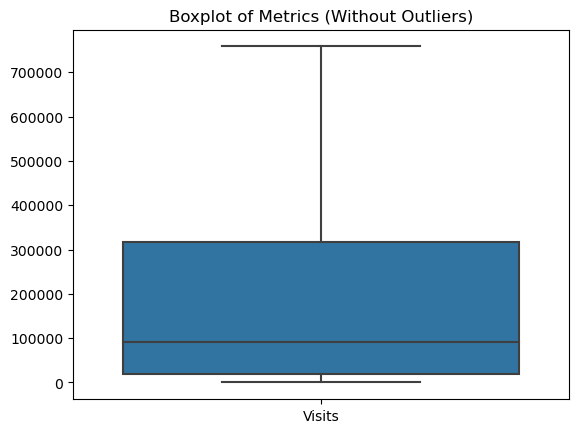

In [21]:
# Boxplot without outliers for Visits
sns.boxplot(data=df_with_no_outliers[['Visits']],showfliers=False)
plt.title("Boxplot of Metrics (Without Outliers)")
plt.show()

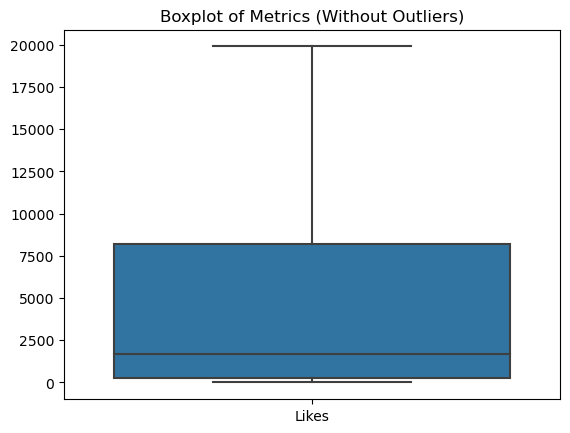

In [22]:
# Boxplot without outliers for Likes
sns.boxplot(data=df_with_no_outliers[['Likes']],showfliers=False)
plt.title("Boxplot of Metrics (Without Outliers)")
plt.show()

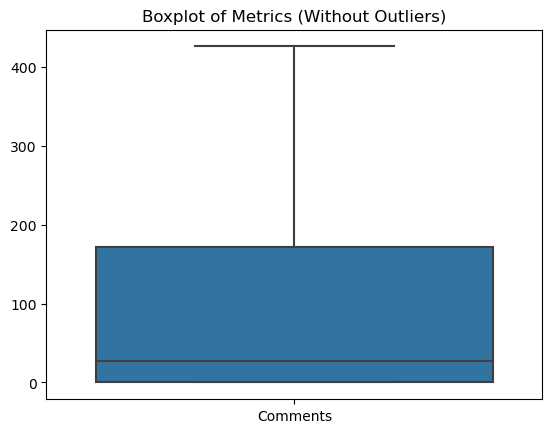

In [238]:
# Boxplot without outliers for Comments
sns.boxplot(data=df_with_no_outliers[['Comments']],showfliers=False)
plt.title("Boxplot of Metrics (Without Outliers)")
plt.show()

In [24]:
# 2. Trend Analysis
# Identify trends among top YouTube streamers
top_streamers = df.nlargest(10, 'Suscribers')
top_streamers

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,NaN,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...
5,6,PewDiePie,"Películas, Videojuegos",111500000.0,Estados Unidos,2400000.0,197300.0,4900.0,http://youtube.com/channel/UC-lHJZR3Gqxm24_Vd_...
6,7,LikeNastyaofficial,Juguetes,107500000.0,Unknown,2600000.0,28000.0,0.0,http://youtube.com/channel/UCJplp5SjeGSdVdwsfb...
7,8,VladandNiki,"Animación, Juguetes",101400000.0,Unknown,4100000.0,22100.0,0.0,http://youtube.com/channel/UCvlE5gTbOvjiolFlEm...
8,9,zeemusiccompany,Música y baile,99700000.0,India,74300.0,2600.0,32.0,http://youtube.com/channel/UCFFbwnve3yF62-tVXk...
9,10,WWE,Videojuegos,97200000.0,Estados Unidos,184500.0,6300.0,214.0,http://youtube.com/channel/UCJ5v_MCY6GNUBTO8-D...


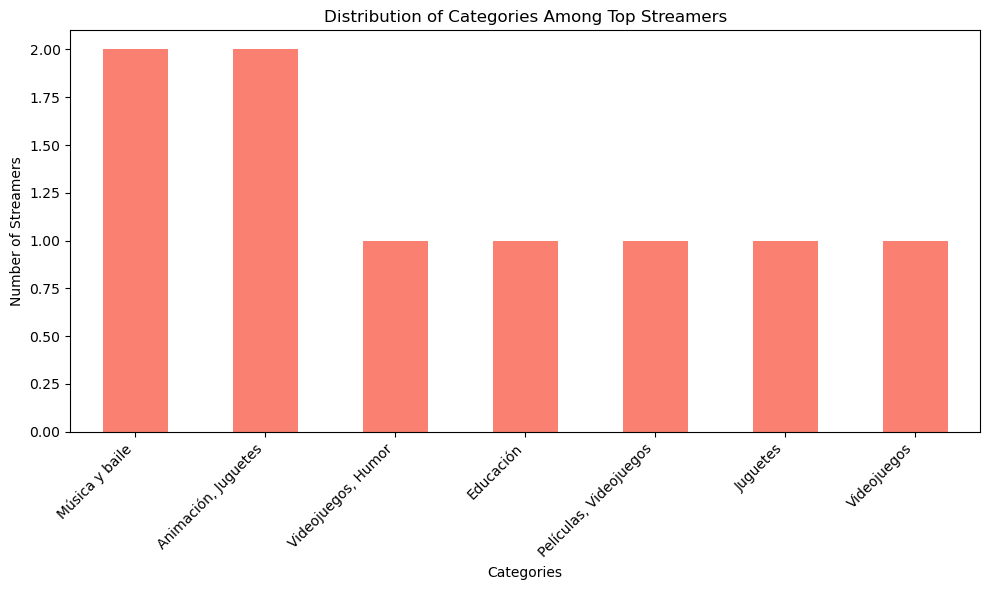

In [25]:
top_streamers_categories = top_streamers['Categories'].value_counts()
top_streamers_categories

plt.figure(figsize=(10, 6))
top_streamers_categories.plot(kind='bar', color='salmon')
plt.title('Distribution of Categories Among Top Streamers')
plt.xlabel('Categories')
plt.ylabel('Number of Streamers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

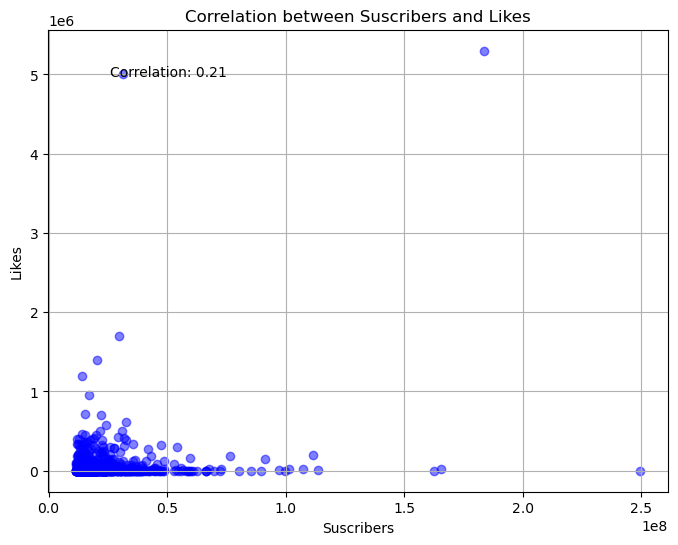

In [28]:
# Correlation between subscribers and likes/comments
correlation_likes = df['Suscribers'].corr(df['Likes'])
correlation_likes

plt.figure(figsize=(8, 6))
plt.scatter(df['Suscribers'], df['Likes'], color='blue', alpha=0.5)
plt.title('Correlation between Suscribers and Likes')
plt.xlabel('Suscribers')
plt.ylabel('Likes')
plt.text(0.1, 0.9, f'Correlation: {correlation_likes:.2f}', transform=plt.gca().transAxes)
plt.grid(True)
plt.show()

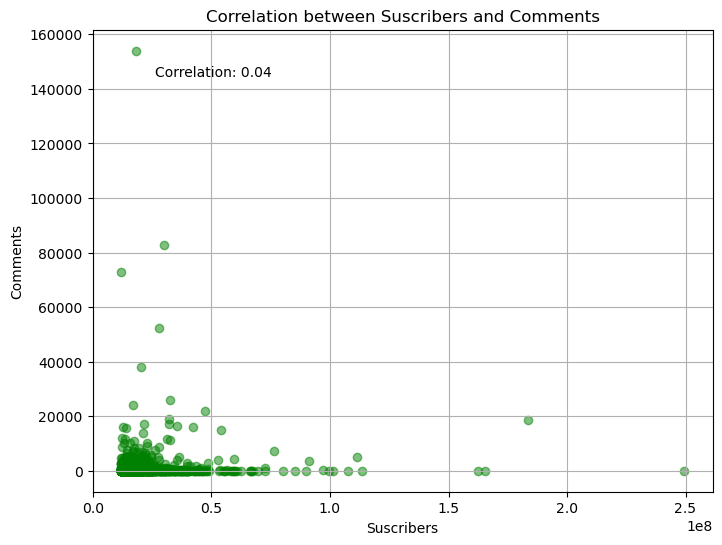

In [29]:
correlation_comments = df['Suscribers'].corr(df['Comments'])
correlation_comments

plt.figure(figsize=(8, 6))
plt.scatter(df['Suscribers'], df['Comments'], color='Green', alpha=0.5)
plt.title('Correlation between Suscribers and Comments')
plt.xlabel('Suscribers')
plt.ylabel('Comments')
plt.text(0.1, 0.9, f'Correlation: {correlation_comments:.2f}', transform=plt.gca().transAxes)
plt.grid(True)
plt.show()

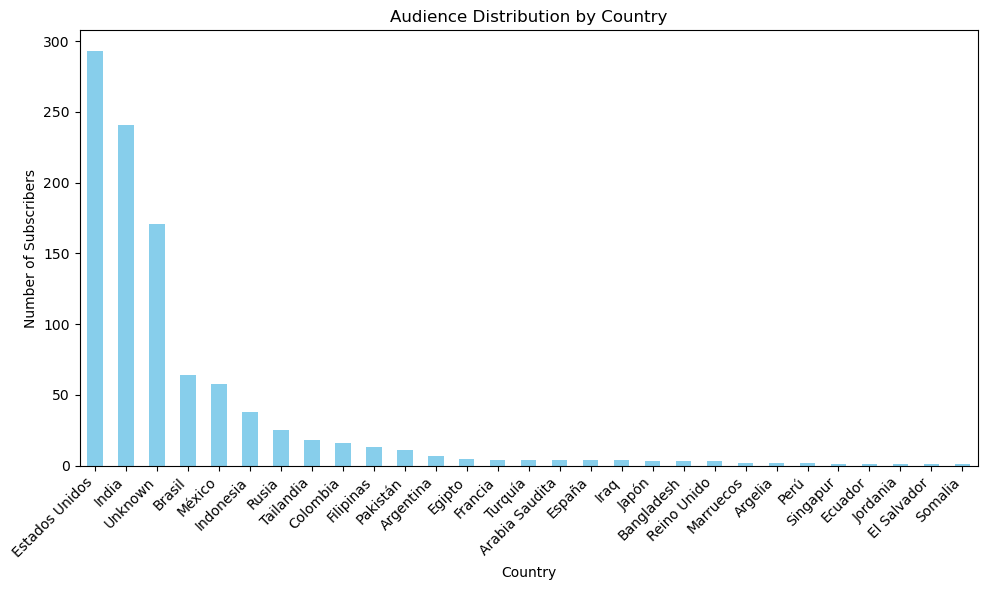

In [30]:
# 3. Audience Study
# Analyze distribution of streamers' audiences by country
audience_distribution = df['Country'].value_counts()

plt.figure(figsize=(10, 6))
audience_distribution.plot(kind='bar', color='skyblue')
plt.title('Audience Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Number of Subscribers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

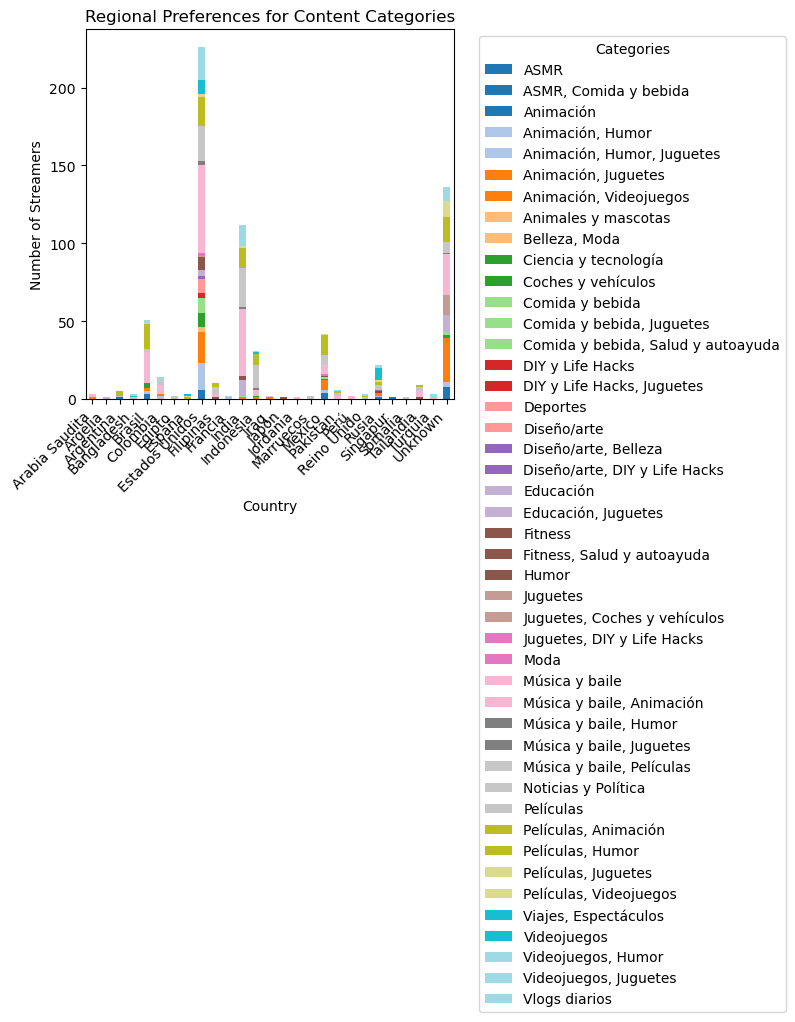

In [32]:
# Regional preferences for content categories
regional_preferences = df.groupby(['Country', 'Categories']).size().unstack(fill_value=0)

# Plot
plt.figure(figsize=(12, 8))
regional_preferences.plot(kind='bar', stacked=True, cmap='tab20')
plt.title('Regional Preferences for Content Categories')
plt.xlabel('Country')
plt.ylabel('Number of Streamers')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Categories', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.subplots_adjust(right=0.7)  
plt.show()

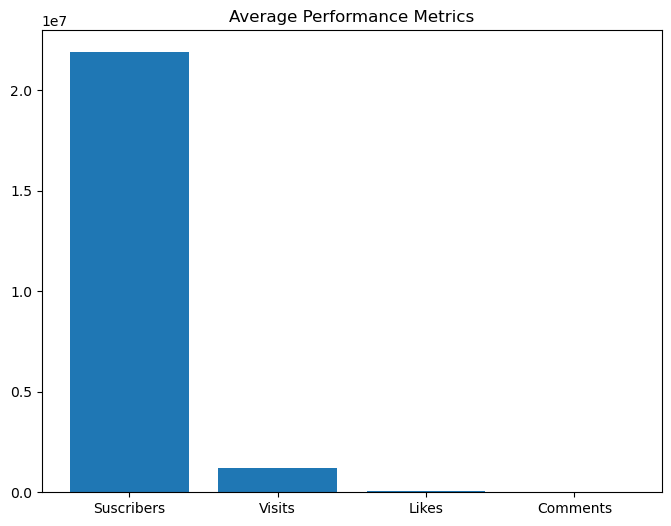

In [33]:
# 4. Performance Metrics
# Calculate and visualize average metrics
average_metrics = df[['Suscribers', 'Visits', 'Likes', 'Comments']].mean()
plt.figure(figsize=(8, 6))
plt.bar(average_metrics.index, average_metrics.values)
plt.title('Average Performance Metrics')
plt.show()

In [280]:
# Anomally: The low average visits relative to subscribers suggests that while many people have subscribed, 
# fewer are actively engaging with the content by visiting the channel or watching videos. 
# This could be due to various reasons such as inactive subscribers, content not reaching the subscribers' feeds, or low retention rates.

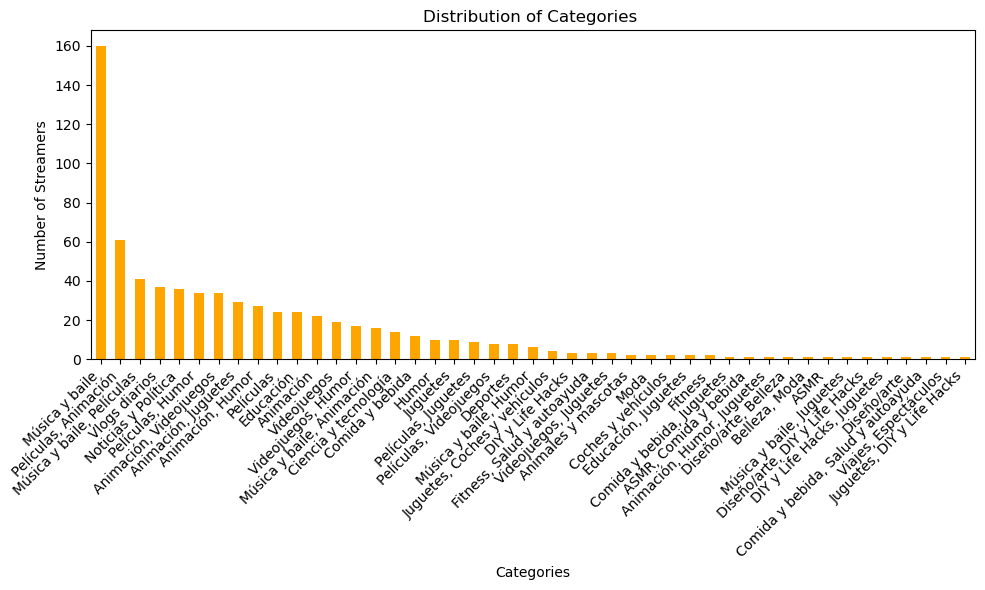

In [34]:
# 5. Content Categories
# Explore distribution of content categories
category_distribution = df['Categories'].value_counts()

plt.figure(figsize=(10, 6))
category_distribution.plot(kind='bar', color='orange')
plt.title('Distribution of Categories ')
plt.xlabel('Categories')
plt.ylabel('Number of Streamers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [35]:
# Exceptional performance metrics by category
category_performance = df.groupby('Categories')[['Suscribers', 'Visits', 'Likes', 'Comments']].mean()
category_performance

,Suscribers,Visits,Likes,Comments
Categories,,,,
ASMR,1.520000e+07,3.685000e+05,4100.000000,148.000000
"ASMR, Comida y bebida",1.300000e+07,5.575000e+05,8600.000000,349.000000
Animación,1.764091e+07,6.367182e+05,21413.454545,396.636364
"Animación, Humor",2.078519e+07,3.760126e+06,145768.333333,5344.962963
"Animación, Humor, Juguetes",1.390000e+07,8.000000e+03,37.000000,0.000000
"Animación, Juguetes",2.937586e+07,5.254483e+05,2653.068966,0.517241
"Animación, Videojuegos",1.939412e+07,1.200059e+06,79294.029412,3786.617647
Animales y mascotas,1.560000e+07,2.231450e+06,102750.000000,2806.000000
"Belleza, Moda",2.390000e+07,9.645000e+05,62300.000000,1100.000000


In [56]:
# 6. Brands and Collaborations
# Analyze brand collaborations with high-performing streamers


In [52]:
high_performers = df[df['Suscribers'] > df['Suscribers'].mean()].copy()

# Calculate average performance metrics for high-performing streamers
average_metrics = high_performers[['Suscribers', 'Visits', 'Likes', 'Comments']].mean()

# Create a new column 'Links Count' to store the count of links
high_performers['Links Count'] = high_performers['Links'].str.count(',') + 1 

# Calculate the total links shared by high-performing streamers
total_links = high_performers['Links Count'].sum()

# Print average metrics and total links
print("Average Performance Metrics for High-Performing Streamers:")
print(average_metrics)
print("\nTotal Links Shared by High-Performing Streamers:", total_links)

Average Performance Metrics for High-Performing Streamers:
Suscribers    3.707030e+07
Visits        2.001183e+06
Likes         8.680301e+04
Comments      1.619927e+03
dtype: float64

Total Links Shared by High-Performing Streamers: 303


In [55]:
# 7. Benchmarking
# Identify top-performing content creators
top_creators = df.nlargest(10, ['Suscribers', 'Visits', 'Likes', 'Comments'])
top_creators

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,NaN,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...
5,6,PewDiePie,"Películas, Videojuegos",111500000.0,Estados Unidos,2400000.0,197300.0,4900.0,http://youtube.com/channel/UC-lHJZR3Gqxm24_Vd_...
6,7,LikeNastyaofficial,Juguetes,107500000.0,Unknown,2600000.0,28000.0,0.0,http://youtube.com/channel/UCJplp5SjeGSdVdwsfb...
7,8,VladandNiki,"Animación, Juguetes",101400000.0,Unknown,4100000.0,22100.0,0.0,http://youtube.com/channel/UCvlE5gTbOvjiolFlEm...
8,9,zeemusiccompany,Música y baile,99700000.0,India,74300.0,2600.0,32.0,http://youtube.com/channel/UCFFbwnve3yF62-tVXk...
9,10,WWE,Videojuegos,97200000.0,Estados Unidos,184500.0,6300.0,214.0,http://youtube.com/channel/UCJ5v_MCY6GNUBTO8-D...


In [57]:
average_metrics = df[['Suscribers', 'Visits', 'Likes', 'Comments']].mean()

# Filter streamers with above-average performance
above_average_streamers = df[
    (df['Suscribers'] > average_metrics['Suscribers']) &
    (df['Visits'] > average_metrics['Visits']) &
    (df['Likes'] > average_metrics['Likes']) &
    (df['Comments'] > average_metrics['Comments'])
]

# Display identified streamers
print("Streamers with Above-Average Performance:")
print(above_average_streamers[['Username', 'Suscribers', 'Visits', 'Likes', 'Comments']])

Streamers with Above-Average Performance:
                  Username   Suscribers       Visits      Likes  Comments
1                  MrBeast  183500000.0  117400000.0  5300000.0   18500.0
5                PewDiePie  111500000.0    2400000.0   197300.0    4900.0
26             dudeperfect   59700000.0    5300000.0   156500.0    4200.0
34             TaylorSwift   54100000.0    4300000.0   300400.0   15000.0
39             JuegaGerman   48600000.0    2000000.0   117100.0    3000.0
43                A4a4a4a4   47300000.0    9700000.0   330400.0   22000.0
58               Mikecrack   43400000.0    2200000.0   183400.0    1800.0
62          KimberlyLoaiza   42100000.0    5300000.0   271300.0   16000.0
64         luisitocomunica   41100000.0    2500000.0   128900.0    1800.0
70             JessNoLimit   39600000.0    1300000.0    73500.0    1600.0
96          TotalGaming093   36300000.0    1500000.0   129400.0    4900.0
98    TechnoGamerzOfficial   35600000.0    6200000.0   341800.0   1650

In [67]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

# Select relevant features
features = ['Suscribers', 'Visits', 'Likes', 'Comments'] 

# Standardize the feature values
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

# Calculate similarity matrix
similarity_matrix = cosine_similarity(df[features])

# Convert the similarity matrix to a DataFrame
similarity_df = pd.DataFrame(similarity_matrix, index=df['Username'], columns=df['Username'])

# Function to recommend streamers to a user
def recommend_streamers(user, num_recommendations=5):
    similar_streamers = similarity_df.loc[user].sort_values(ascending=False)[1:num_recommendations+1]
    return similar_streamers

# Example: Recommend streamers for a user
username = 'PewDiePie'  
recommended_streamers = recommend_streamers(username)
print("Recommended Streamers for", username, ":")
print(recommended_streamers)



Recommended Streamers for PewDiePie :
Username
BLACKPINK       0.997876
JessNoLimit     0.997635
JuegaGerman     0.995926
ArianaGrande    0.993049
felipeneto      0.988500
Name: PewDiePie, dtype: float64


**In This System**
- We select relevant features such as subscribers, views, likes, and dislikes.
- We standardize the feature values to have mean 0 and standard deviation 1.
- We calculate the cosine similarity between streamers based on these features.
- We create a function to recommend streamers to a given user.
- Finally, we use this function to recommend streamers for a specific user.
